<a href="https://colab.research.google.com/github/vkthakur90/AI_Applications/blob/master/CandleStick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install --upgrade mplfinance
!pip install --upgrade pandas_ta

In [2]:
import yfinance as yf
import mplfinance as mpf
import pandas_ta as ta

In [3]:
NAME = "^NSEI"
ticker = yf.Ticker(NAME)

In [4]:
history_df = ticker.history(period = "10y", interval = '1wk')

In [5]:
# Step 2: Calculate technical indicators using pandas-ta
history_df['5 EMA'] = ta.ema(history_df['Close'], length=5)
history_df['20 EMA'] = ta.ema(history_df['Close'], length=20)  # 20-day Exponential Moving Average
history_df['50 EMA'] = ta.ema(history_df['Close'], length=50)  # 50-day Exponential Moving Average
history_df.dropna(inplace = True)

In [6]:
data_df = history_df.iloc[-100:]

In [7]:
ema5 = mpf.make_addplot(data_df['5 EMA'], color='black', width=2)
ema20 = mpf.make_addplot(data_df['20 EMA'], color='blue', width=2)
ema50 = mpf.make_addplot(data_df['50 EMA'], color='red', width=2)

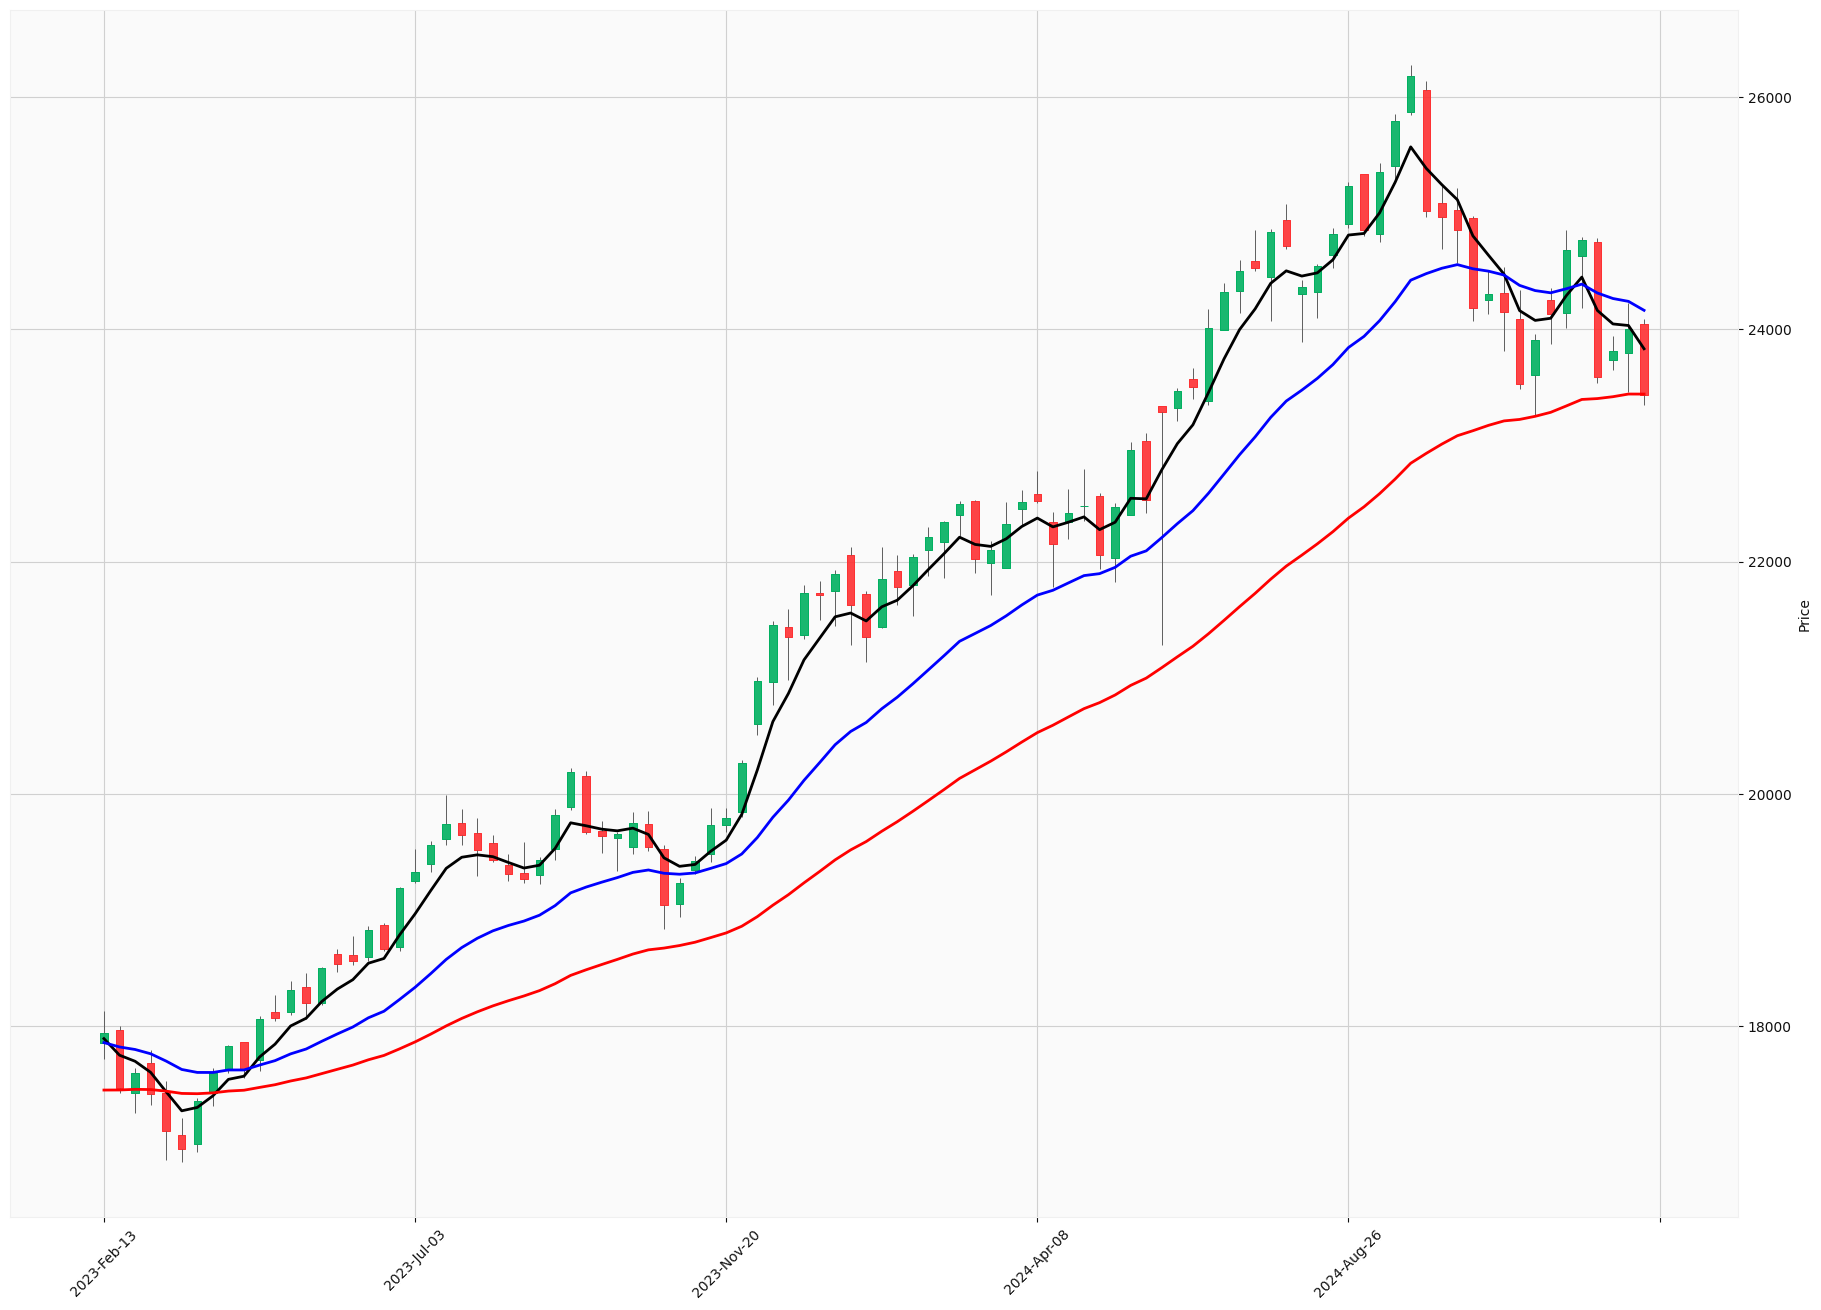

In [8]:
mpf.plot(
    data_df,
    type="candle",  # Candlestick chart
    volume = False,
    style="yahoo",  # Chart style
    addplot=[ema5, ema20, ema50],
    figscale=3
)